# Playing with Torch

In [1]:
pip install torch torchvision 'numpy<2'


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Simple stuff

In [2]:
import torch

torch.ones(1, dtype=torch.complex128)

tensor([1.+0.j], dtype=torch.complex128)

In [3]:
print(torch.add(5, 5))
torch.add(5, 5).dtype

tensor(10)


torch.int64

In [4]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [5]:
#                           h  w
random_tensor = torch.randn(4, 6)
random_tensor

tensor([[-0.0267,  0.0941, -0.7123, -1.1687,  1.6566,  1.8658],
        [ 1.4554,  0.7119,  1.1577,  0.8341, -1.1584,  0.6798],
        [ 0.3334, -1.3840, -1.2557, -0.3094,  0.6518, -0.8732],
        [ 0.7109,  0.9804, -0.5025, -0.6156, -1.2304, -0.3339]])

In [6]:
a = torch.randn(2, 3)
b = torch.randn(3, 2)
print(a)
print(b)
print(a @ b)

tensor([[0.9242, 1.6301, 0.7041],
        [1.4554, 0.5632, 1.1433]])
tensor([[-0.4055, -0.9211],
        [-0.2195, -0.3303],
        [ 0.9679,  1.1602]])
tensor([[-0.0512, -0.5730],
        [ 0.3928, -0.2003]])


## MPS backend: for 🍎

https://developer.apple.com/metal/pytorch/

In [7]:
torch.randn((2,3), device=torch.device('mps'))

tensor([[ 0.4761, -0.2536,  1.1534],
        [ 1.2602,  0.3484,  0.2527]], device='mps:0')

In [8]:
torch.backends.mps.is_available()

True

It's `True`! I'm so happy…

## torch.layout

In [9]:
x = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
x

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [10]:
(x.stride(), x.shape, x.t().stride(), x.t().shape)

((5, 1), torch.Size([2, 5]), (1, 5), torch.Size([5, 2]))

In [11]:
help(x.layout)

Help on layout object:

class layout(builtins.object)
 |  Methods defined here:
 |
 |  __repr__(self, /)
 |      Return repr(self).



In [12]:
dir(x)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_

## Preparing a dataset

In [13]:
from torchvision import datasets, transforms


In [14]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

In [15]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

Transform I want to apply to the dataset:

In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    # XXX how do I know these numbers??
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])

In [17]:
# XXX Is this good enough? Shouldn't I split dataset?
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [18]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Let's define a drawing helper:

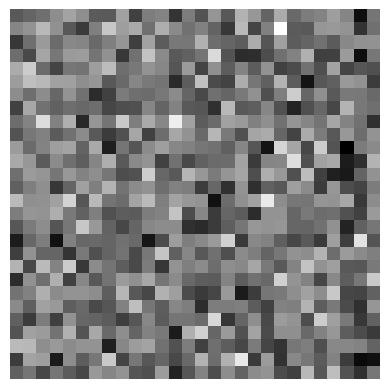

In [19]:
import matplotlib.pyplot as plt

def draw(guy: torch.Tensor):
    plt.imshow(guy, cmap='gray')
    plt.axis('off')
    plt.show()

tensor = torch.randn(28, 28)
draw(tensor)

In [20]:
for batch_idx, (data, target) in enumerate(train_loader):
    # data & target are torch.Tensors
    # Data is a series of images, target is a seires of numbers that
    # are on the images
    print(f'Batch {batch_idx + 1}, Data shape: {data.shape}, Target shape: {target.shape}')

    # Uncomment to see some digits
    # draw(data[0][0])
    # print(target[0])

Batch 1, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 2, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 3, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 4, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 5, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 6, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 7, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 8, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 9, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 10, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 11, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 12, Data shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])
Batch 13, Data shape: tor

In [21]:
dir(train_loader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

## The Meat

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class DigitRecognizer(nn.Module):
    def __init__(self):
        super(DigitRecognizer, self).__init__()

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(28 * 28, 32 * 32)
        self.fc2 = nn.Linear(32 * 32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [23]:
model = DigitRecognizer()
model

DigitRecognizer(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [24]:
model(torch.randn(1, 1, 28, 28))

tensor([[ 0.2111,  0.0719, -0.0057, -0.1056, -0.0346,  0.0559, -0.1909,  0.0955,
         -0.1660, -0.2542]], grad_fn=<AddmmBackward0>)

In [25]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [26]:
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

In [27]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [28]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Training complete.')

Epoch [1/5], Step [100/938], Loss: 0.4621
Epoch [1/5], Step [200/938], Loss: 0.2429
Epoch [1/5], Step [300/938], Loss: 0.2004
Epoch [1/5], Step [400/938], Loss: 0.1705
Epoch [1/5], Step [500/938], Loss: 0.1533
Epoch [1/5], Step [600/938], Loss: 0.1279
Epoch [1/5], Step [700/938], Loss: 0.1295
Epoch [1/5], Step [800/938], Loss: 0.1148
Epoch [1/5], Step [900/938], Loss: 0.1138
Epoch [2/5], Step [100/938], Loss: 0.0865
Epoch [2/5], Step [200/938], Loss: 0.0901
Epoch [2/5], Step [300/938], Loss: 0.0755
Epoch [2/5], Step [400/938], Loss: 0.0882
Epoch [2/5], Step [500/938], Loss: 0.0860
Epoch [2/5], Step [600/938], Loss: 0.0742
Epoch [2/5], Step [700/938], Loss: 0.0820
Epoch [2/5], Step [800/938], Loss: 0.0749
Epoch [2/5], Step [900/938], Loss: 0.0683
Epoch [3/5], Step [100/938], Loss: 0.0504
Epoch [3/5], Step [200/938], Loss: 0.0531
Epoch [3/5], Step [300/938], Loss: 0.0589
Epoch [3/5], Step [400/938], Loss: 0.0550
Epoch [3/5], Step [500/938], Loss: 0.0566
Epoch [3/5], Step [600/938], Loss:

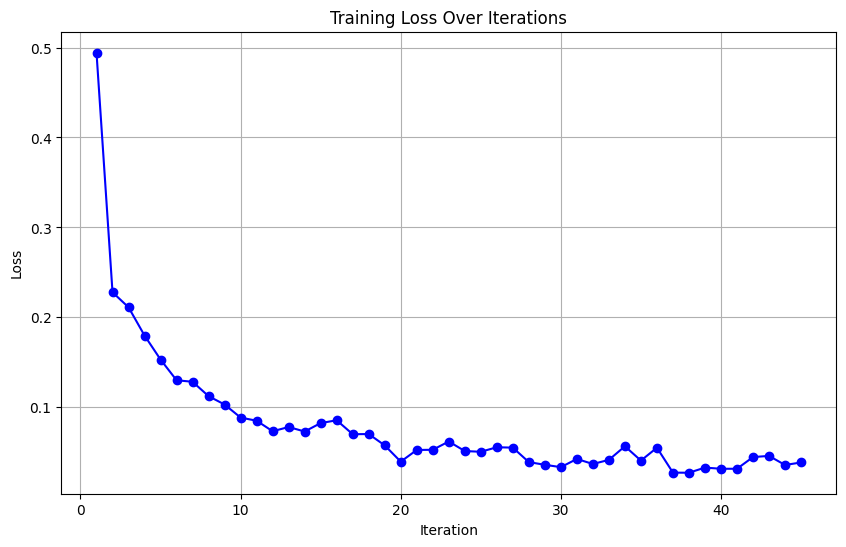

In [29]:

loss =[ 0.4942, 0.2279, 0.2112, 0.1798, 0.1531, 0.1301, 0.1284, 0.1124,
0.1031, 0.0886, 0.0851, 0.0734, 0.0781, 0.0731, 0.0825, 0.0856, 0.0701,
0.0703, 0.0577, 0.0396, 0.0526, 0.0528, 0.0620, 0.0514, 0.0506, 0.0556,
0.0552, 0.0391, 0.0361, 0.0335, 0.0426, 0.0370, 0.0416, 0.0567, 0.0408,
0.0551, 0.0274, 0.0273, 0.0330, 0.0317, 0.0317, 0.0447, 0.0460, 0.0359,
0.0387,
]
iterations = list(range(1, len(loss) + 1))

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')

# Show the plot
plt.grid(True)
plt.show()

In [30]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [31]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [34]:
# Validation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [33]:
print(f'Correctness: {correct/total * 100}%')

Correctness: 97.99%
